In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
sns.plotting_context(context='paper')
sns.set_palette('rainbow')

import pandas as pd
import neuralprophet

In [2]:
transactions = pd.read_csv('../../../data/kaggle/spanish_retail_transactions.csv')

In [3]:
transactions['date'] = pd.to_datetime(transactions['date'])

<AxesSubplot:xlabel='date'>

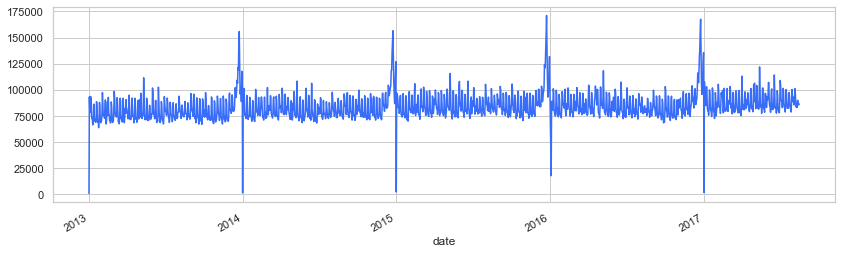

In [6]:
transactions_per_day = transactions.groupby('date')['transactions'].sum()
transactions_per_day.plot(figsize=(14, 4))

In [22]:
split_point = '2016-06-01'

training_data = transactions_per_day.loc[transactions_per_day.index < split_point]
validation_data = transactions_per_day.loc[transactions_per_day.index >= split_point]

training_data = training_data.reset_index().rename(columns={'date': 'ds', 'transactions': 'y'})

In [34]:
m = neuralprophet.NeuralProphet()
m.add_country_holidays(country_name='Spain', lower_window=-4, upper_window=2)

In [35]:
m.fit(training_data)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.517% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Linus Folkerts\.conda\envs\hackupc-demand-forecasting\lib\site-packages\neuralprophet\time_dataset.py:491: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  additive_events[key] = offset_feature

WARNING - (py.warnings._showwarnmsg) - C:\Users\Linus Folkerts\.conda\envs\hackupc-demand-forecastin

  0%|          | 0/128 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.67E-02, min: 1.04E+00


  0%|          | 0/128 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.67E-02, min: 4.59E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.02E-02
Epoch[181/181]: 100%|██████████| 181/181 [00:14<00:00, 12.61it/s, SmoothL1Loss=0.00198, MAE=3.76e+3, RMSE=5.86e+3, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.448187,82956.471984,100742.238979,0.0
1,0.404464,77726.175395,94940.714859,0.0
2,0.353424,71580.209369,87430.552629,0.0
3,0.292886,64117.382716,78619.004790,0.0
4,0.223458,55091.496384,67659.366614,0.0
...,...,...,...,...
176,0.001986,3760.323615,5872.399019,0.0
177,0.001980,3763.907000,5854.791304,0.0
178,0.001977,3765.564762,5871.237292,0.0
179,0.001976,3763.140595,5762.052220,0.0


In [36]:
prediction_timeframe = pd.DataFrame({'ds': pd.date_range(transactions_per_day.index.min(), transactions_per_day.index.max())})

In [37]:
forecast = m.predict(training_data)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.517% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.517% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - C:\Users\Linus Folkerts\.conda\envs\hackupc-demand-forecasting\lib\site-packages\neuralprophet\time_dataset.py:491: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  additive_events[key] = offset_feature

WARNING - (py.warnings._showwarnmsg) - C:\Users\Linus Folkerts\.conda\envs\hackupc-demand-forecasting\lib\site-packages\neuralprophet\time_dataset.py:491: Perf

<AxesSubplot:xlabel='ds'>

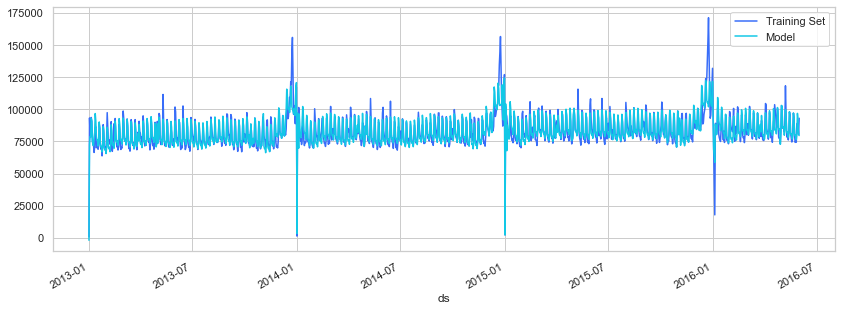

In [38]:
fig, ax = plt.subplots(figsize=(14, 5))

training_data.plot(ax=ax, x='ds', y='y', label='Training Set')
forecast.plot(ax=ax, x='ds', y='yhat1', label='Model')